<a href="https://colab.research.google.com/github/junyeog/deep-learning-practice-/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #드라이브 마운트
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [ ]:
from tensorflow.keras.models import Sequential #라이브러리 불러오기
from tensorflow.keras.layers import Dense, Input
from keras.utils import plot_model
import numpy as np

### 2. 데이터 준비

In [ ]:
!git clone https://github.com/taehojo/data.git #데이터 저장

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16] #x를 0부터 16번까지
y = Data_set[:,16]

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 7.00 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import pandas as pd
df= pd.read_csv('./data/ThoraricSurgery3.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [37]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target= train_test_split(X,y,test_size=0.2,random_state=42)

### 3. 구조 결정

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

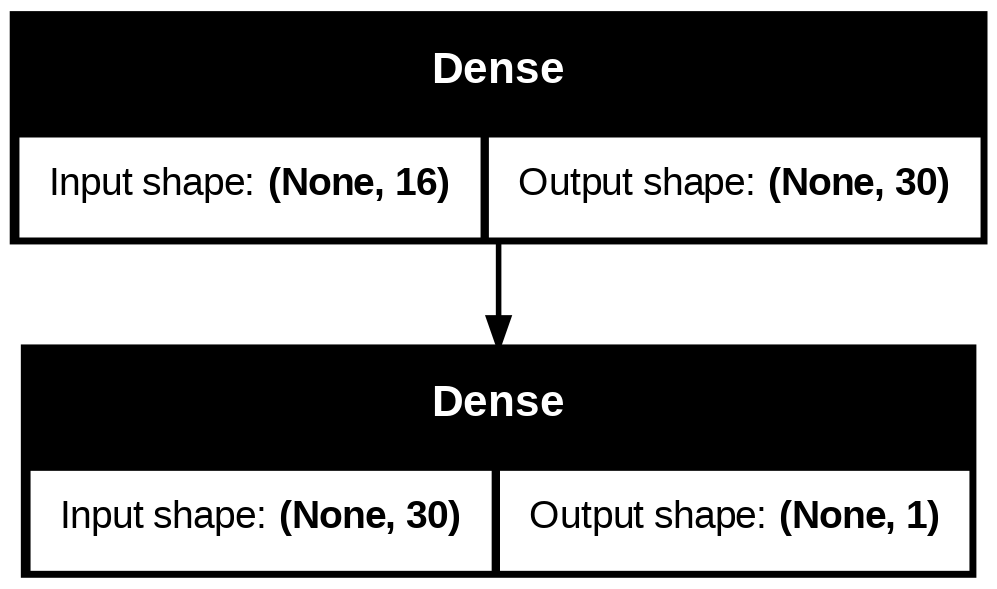

In [ ]:
#model = Sequential([
  #Input(shape=(16,)) # 모델 구조 결정
  #,Dense(30, activation='relu')
  #,Dense(1, activation= 'sigmoid')
#])

# model.add(Dense(30, input_shape=(16,), activation='relu'))
# model.add(Dense(1, activation= 'sigmoid'))
model=Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.summary()
plot_model(model,show_shapes=True)

### 4. 모델 실행

In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16) # 실행

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8616 - loss: 0.3816
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8576 - loss: 0.3676
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.3652
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8632 - loss: 0.3542
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8501 - loss: 0.3747


In [74]:
history.history

{'accuracy': [0.8553191423416138,
  0.8595744967460632,
  0.8702127933502197,
  0.8617021441459656,
  0.8574467897415161],
 'loss': [0.391531765460968,
  0.37070053815841675,
  0.3751879036426544,
  0.36833953857421875,
  0.3682508170604706]}

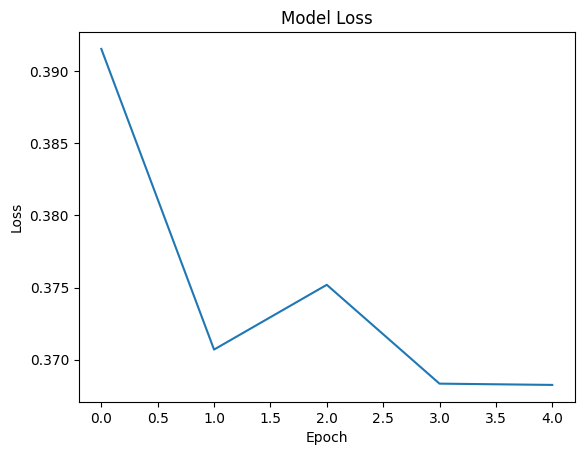

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


In [73]:
loss,accuracy=model.evaluate(test_input,test_target)
print(f"Test Loss: {loss:4f}")
print(f"Test Accuracy: {accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8290 - loss: 0.3798 
Test Loss: 0.382721
Test Accuracy: 0.8298


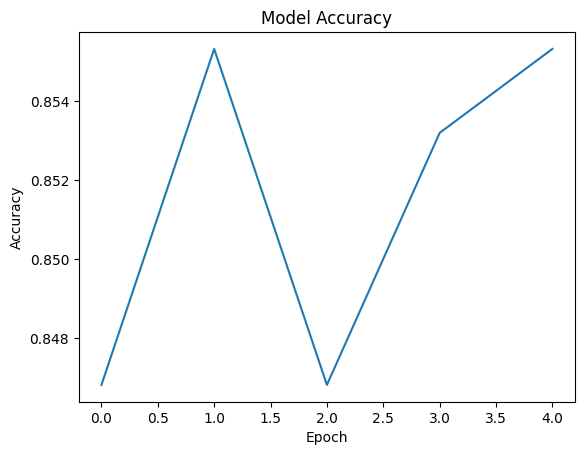

In [55]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,168 (12.38 KB)

 Trainable params: 3,168 (12.38 KB)

 Non-trainable params: 0 (0.00 B)

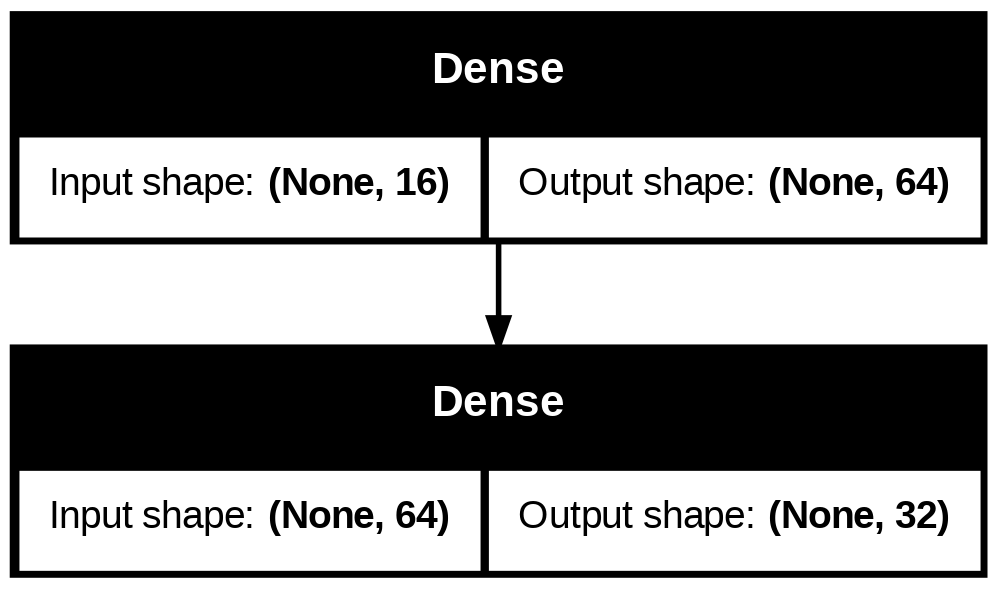

In [40]:
model2=Sequential()
model2.add(Input(shape=(16,)))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.summary()
plot_model(model2,show_shapes=True)

In [68]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16) # 실행

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8454 - loss: 0.3821
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8628 - loss: 0.3905
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8805 - loss: 0.3265
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8649 - loss: 0.3614
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8382 - loss: 0.4070


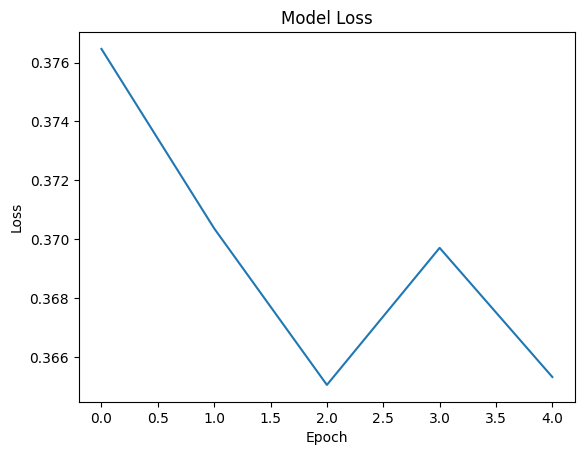

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


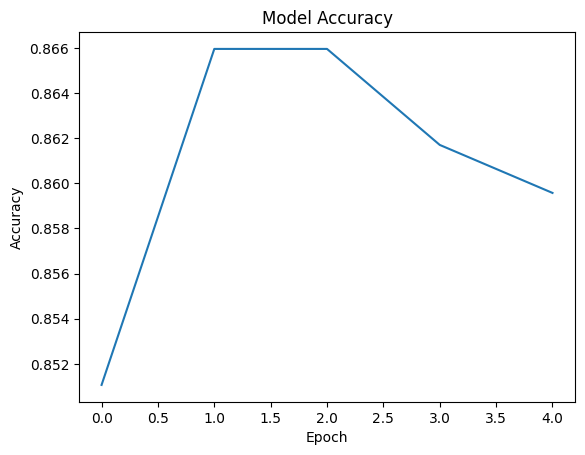

In [70]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()